<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-3 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> MNIST Fashion Dataset Application with Keras </h2> </html>


This is a sample image classification tutorial with the MNIST fashion image dataset.

In [1]:
# Your code to import TensorFlow

import tensorflow as tf
# Your code to import Keras
from tensorflow import keras
# Your code to import Numpy

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2026-02-12 07:52:15.750919: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-12 07:52:16.435483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-12 07:52:19.845377: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


2.20.0


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt

print(tf.__version__)

2.20.0


### Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen below.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:




_______________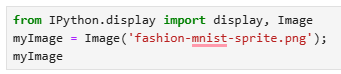

In [3]:
from IPython.display import display, Image
#myImage = Image ('') 

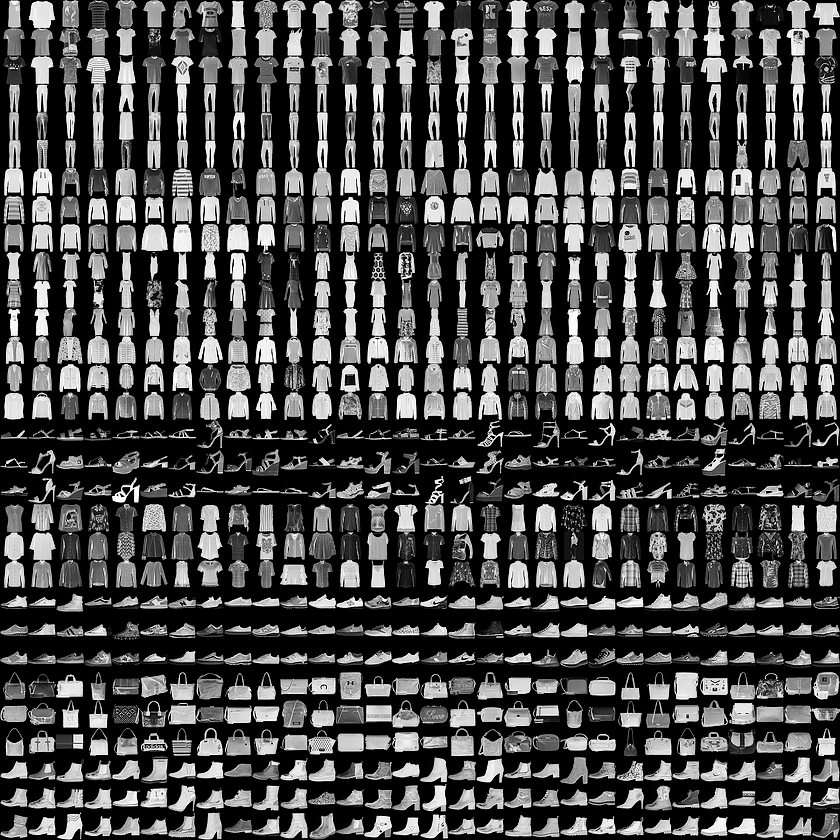

_______________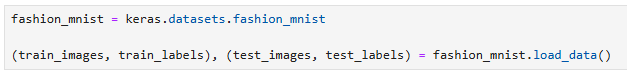

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_labels) , (test_images, test_labels)= fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



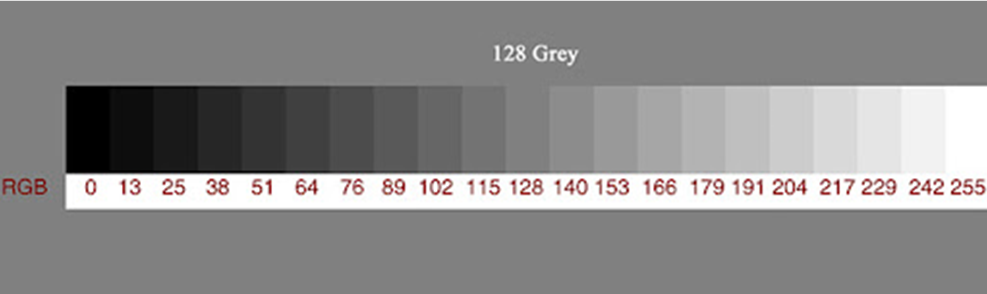
RGB grayscale Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [5]:
# Each image is mapped to a single label. Since the *class names* are not included with the dataset, 
# store them here to use later when plotting the images:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [6]:
# Your code to print the shape of the training images

train_images.shape


(60000, 28, 28)

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [7]:
# Your code to print the length of train labels

len(train_labels)

60000

60000

Each label is an integer between 0 and 9:

In [8]:
# Your code to print the training labels

train_labels

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [9]:
# Your code to print the shape of the test set images

test_images.shape

(10000, 28, 28)

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [10]:
# Your code to print the length of the test labels

len(test_labels)

10000

10000

### Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

__________________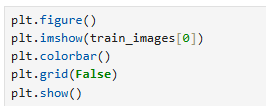

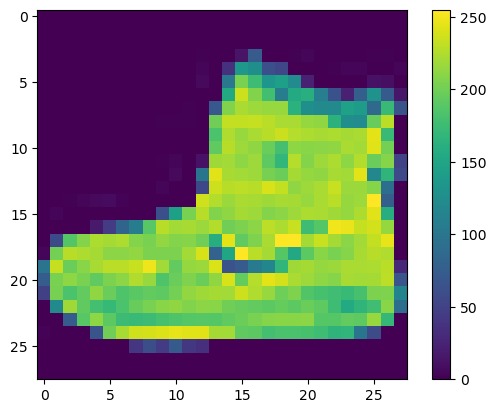

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

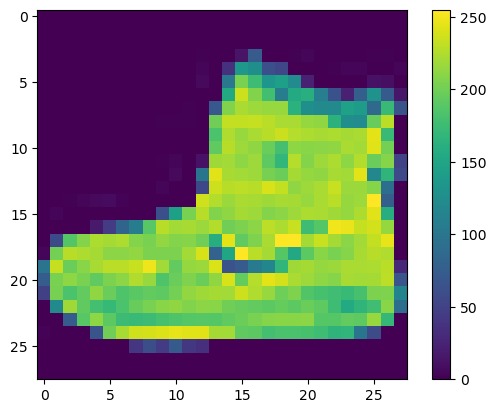

_________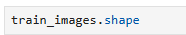

In [12]:
train_images.shape

(60000, 28, 28)

(60000, 28, 28)

________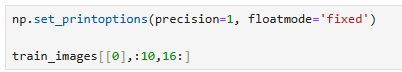

In [13]:
np.set_printoptions(precision =1 , floatmode='fixed')
train_images[[0],:10,16:]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
        [218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
        [233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
        [223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0]]],
      dtype=uint8)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
        [218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
        [233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
        [223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0]]],
      dtype=uint8)

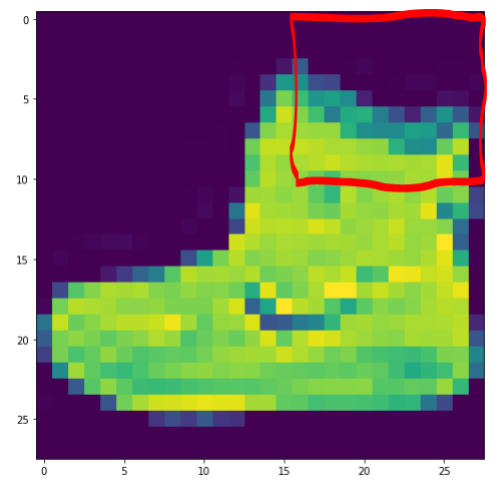

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

_____________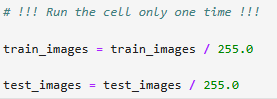

In [14]:
train_images =train_images / 255.0
test_images= test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

_______________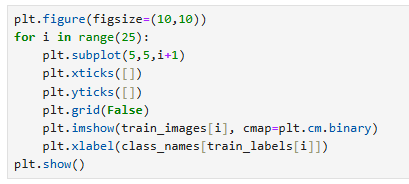

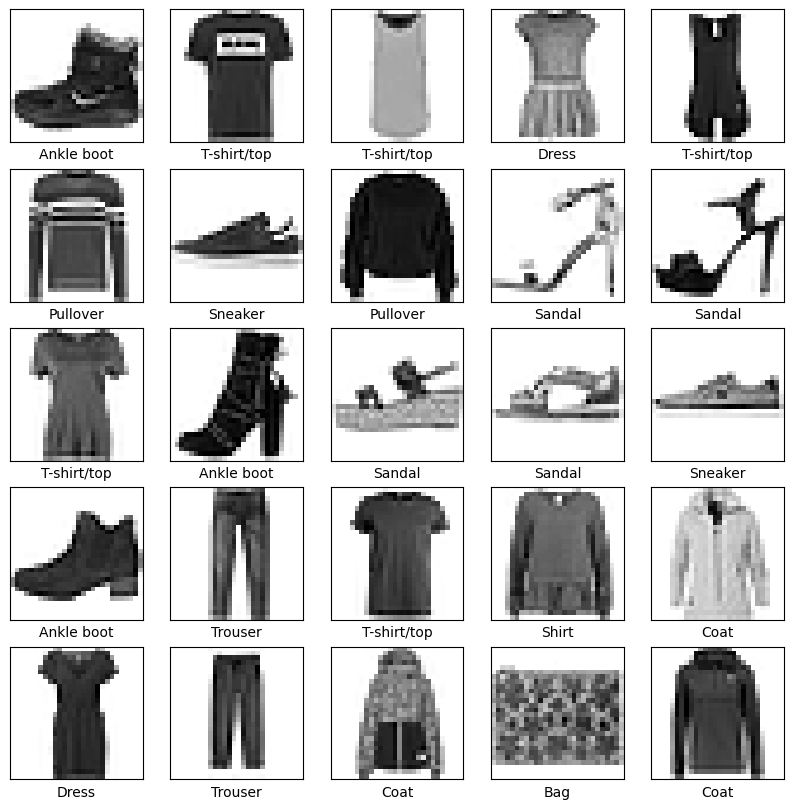

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

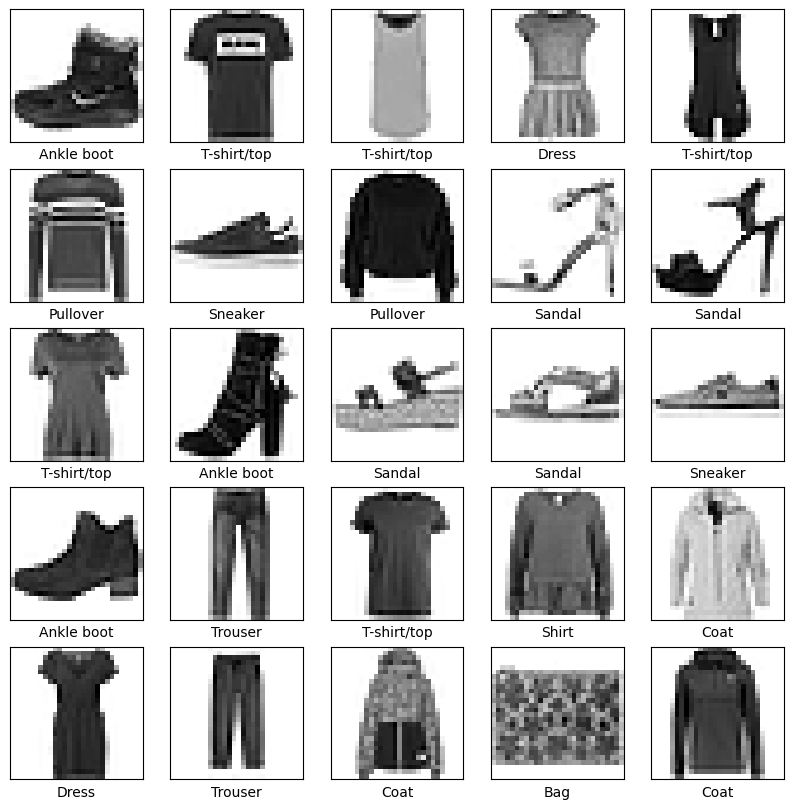

<html> <h2 style="font-style:bold; color:blue;"> Build the model </h2> </html>


Building the neural network requires configuring the layers of the model, then compiling the model.

Develop a a neural network model of your choice i.e. number of layers and activation function. Remember the input is a 2-D so you need to flatten the input.

The first layer in this network, keras.layers.Flatten, should transform the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [16]:
#
# Your code to build the neural network model.
#

# Use model.add.Flatten() layer as the first layer.
# Choose softmax in the output layer. Choose the number of layers and activation functions in the hidden layers of your choice.
# Do not forget to set a correct number of neurons in the output layer.

# ...
# ...
# ...
# ...
model =keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),

    keras.layers.Dense(10, activation='softmax')

])



/home/suriya/anaconda3/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1770882795.522967   64129 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1770882795.538702   64129 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


_____________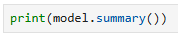

In [17]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,906 (909.79 KB)

 Trainable params: 232,906 (909.79 KB)

 Non-trainable params: 0 (0.00 B)

None


In [103]:
# The result will be different, as your particular unique model should be demonstrated here


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> Compile the model </h3> </html>

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


We have used 'adam' optimizer. Try other optimizer functions. Use Keras API as a reference  

_____________________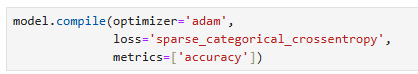

In [18]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

<html> <h3 style="font-style:italic; color:blue;"> Train the model </h3> </html>

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



#### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

If you use your laptop without GPU, reduce epochs, number:  epochs=20

_______________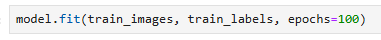

In [30]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8130 - loss: 0.5101
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8603 - loss: 0.3804
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8731 - loss: 0.3427
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8827 - loss: 0.3210
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8871 - loss: 0.3038
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8923 - loss: 0.2899
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8965 - loss: 0.2782
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9007 - loss: 0.2648
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9026 - loss: 0.2606
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9059 - loss: 0.2520
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9089 - loss: 0.2436
Epoch 12/25
1875/1875 ━━━━━

As the model trains, the loss and accuracy metrics are displayed.

________________________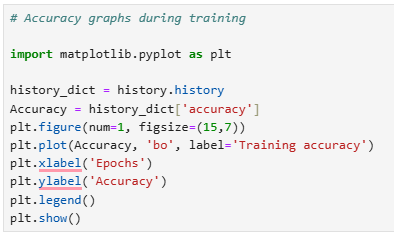

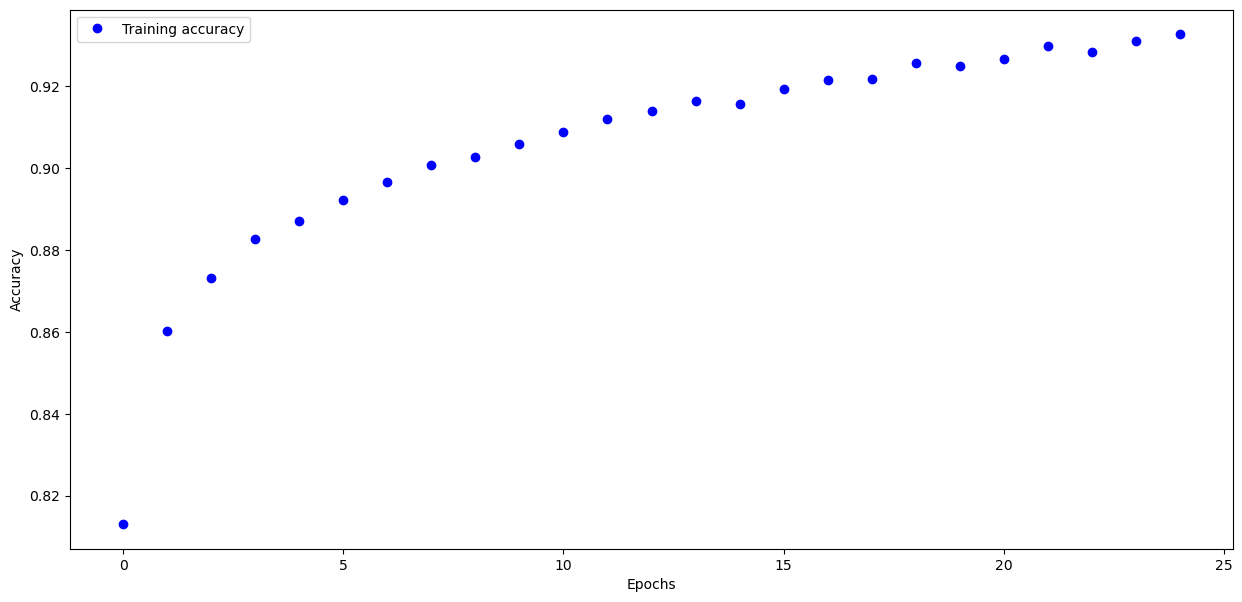

In [32]:
import matplotlib.pyplot as plt

history_dict = history.history
Accuracy =history_dict['accuracy']

plt.figure(num=1,figsize=(15,7))
plt.plot(Accuracy , 'bo' ,label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

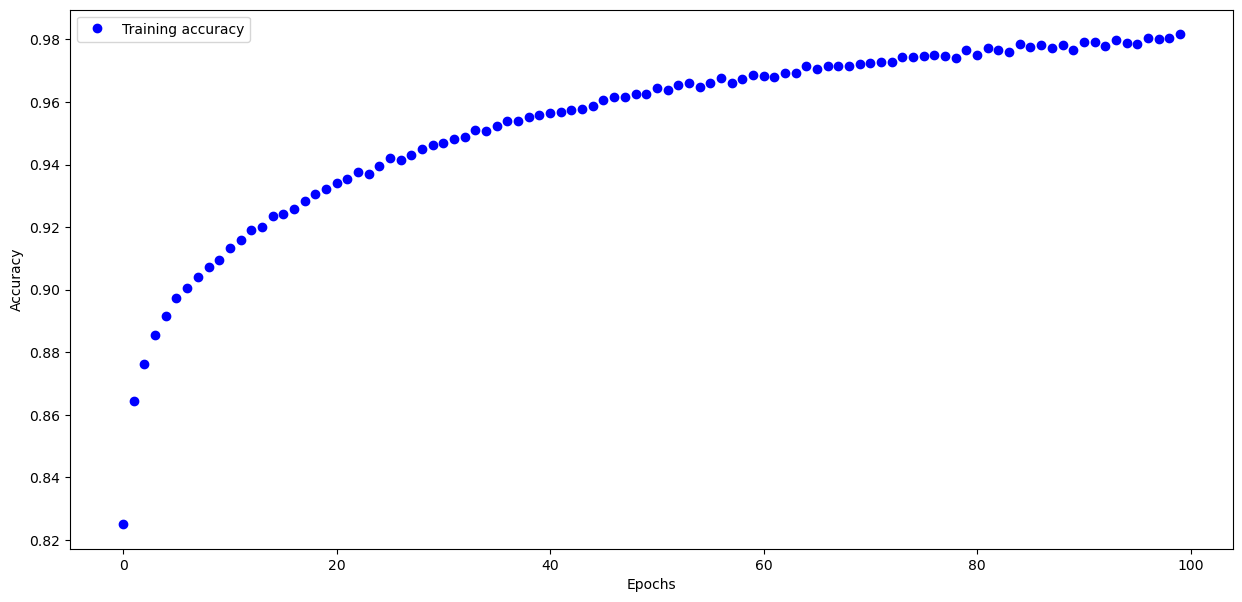

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

_________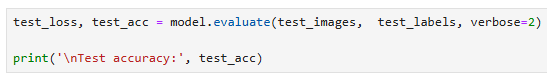

In [33]:
test_loss , test_acc= model.evaluate(test_images ,  test_labels , verbose =2)
print('\nTest accuracy: ' , test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8869 - loss: 0.4190

Test accuracy:  0.886900007724762


313/313 - 2s - 7ms/step - accuracy: 0.8852 - loss: 0.7656

Test accuracy: 0.885200023651123


### Make predictions

With the model trained, you can use it to make predictions about some images.

______________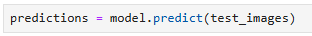

In [34]:
predictions= model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

___________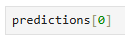

In [36]:
predictions[0]

array([3.0e-21, 1.2e-19, 6.2e-19, 2.4e-23, 8.5e-27, 1.3e-10, 1.7e-22,
       4.9e-06, 8.2e-17, 1.0e+00], dtype=float32)

array([2.7e-13, 0.0e+00, 1.2e-25, 0.0e+00, 4.6e-33, 2.2e-13, 5.5e-27,
       2.7e-12, 1.3e-22, 1.0e+00], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

_________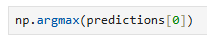

In [47]:
output=np.argmax(predictions[0])
int(output)

9

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

________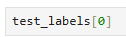

In [48]:
int(test_labels[0])

9

In [126]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [49]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

____________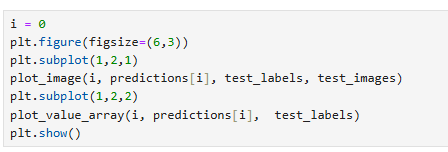

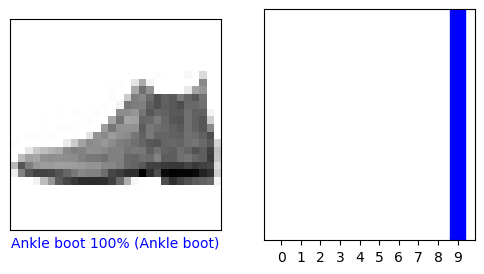

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i] , test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i ,predictions[i] , test_labels)
plt.show()

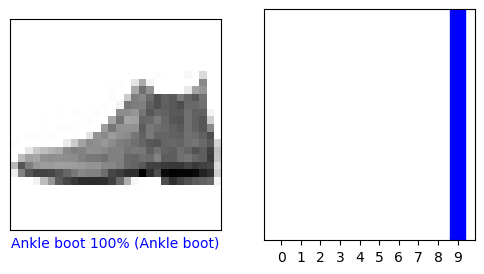

Plot any other image

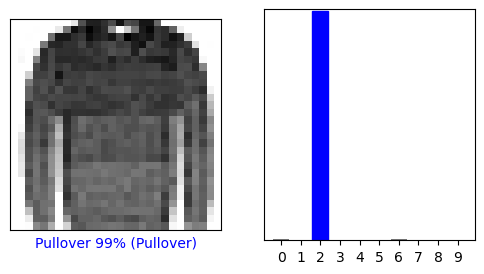

In [58]:
# Your code to plot any other image and confidense score of your choise

i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i] , test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i ,predictions[i] , test_labels)
plt.show()


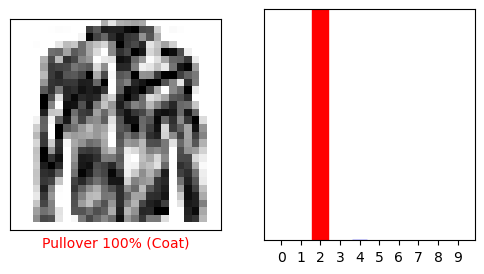

In [142]:
# Plot several images with their predictions.
# In the next cell, you need to plot the first 15 images in the following format.

# Use the sample code of the plots provided in this tutorial. Hint - You need to
# use subplots, for loop, etc..

# Plot the first X test images, their predicted labels, and the true labels.

# Color correct predictions in blue and incorrect predictions in red.

________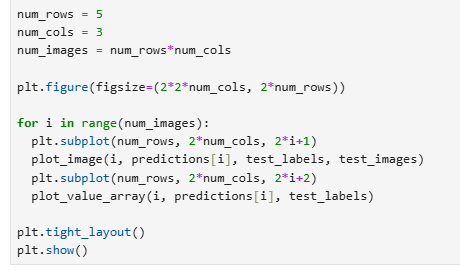

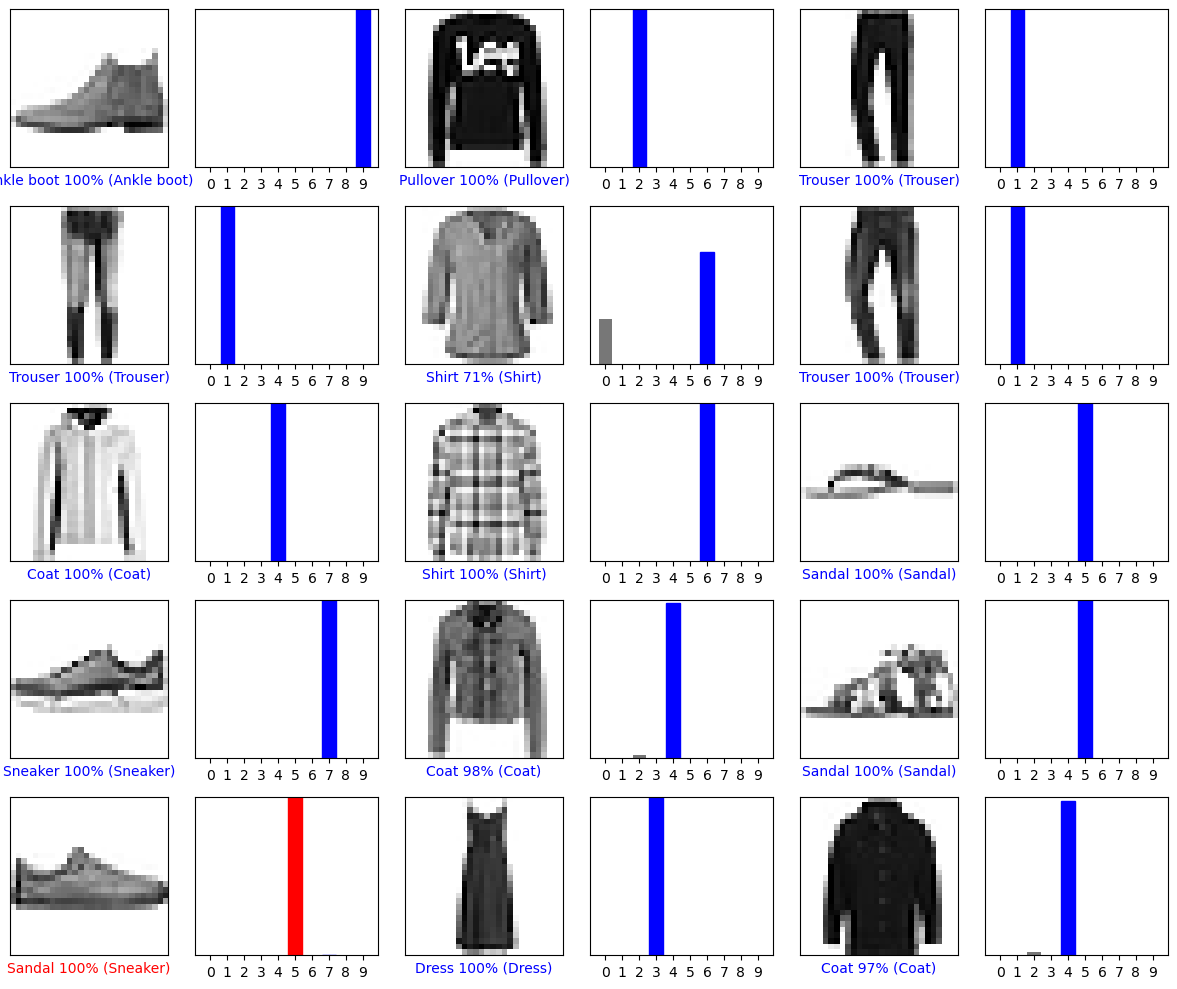

In [62]:
num_rows = 5
num_cols =3
num_images = num_rows * num_cols
plt.figure(figsize= (2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , predictions[i] , test_labels, test_images)
    plt.subplot(num_rows , 2* num_cols , 2*i+2)
    plot_value_array(i, predictions[i] , test_labels)

plt.tight_layout()
plt.show()

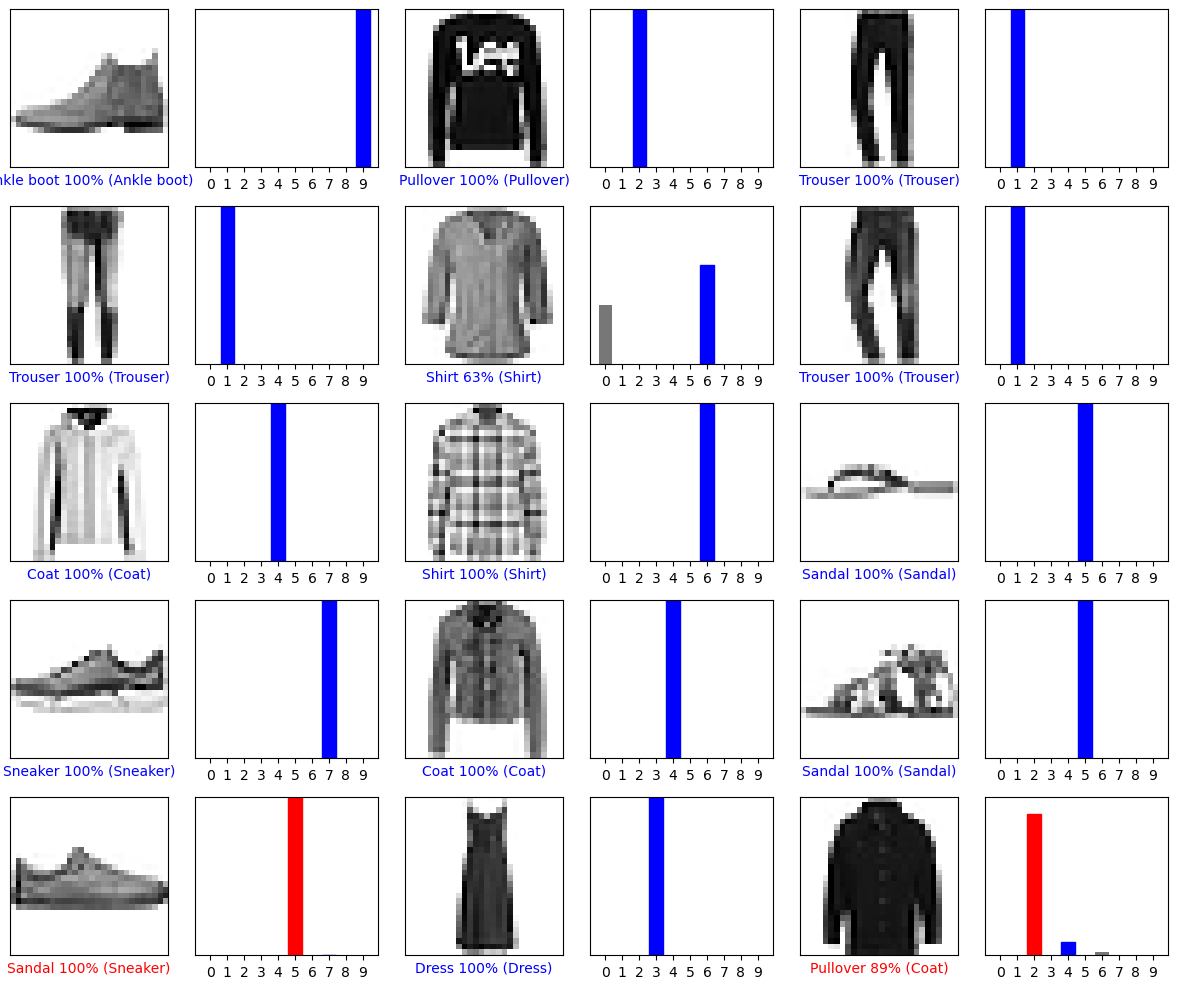

In [148]:
#
# Your code to plot first 20 predictions in the above format.
#
# ...
# ...

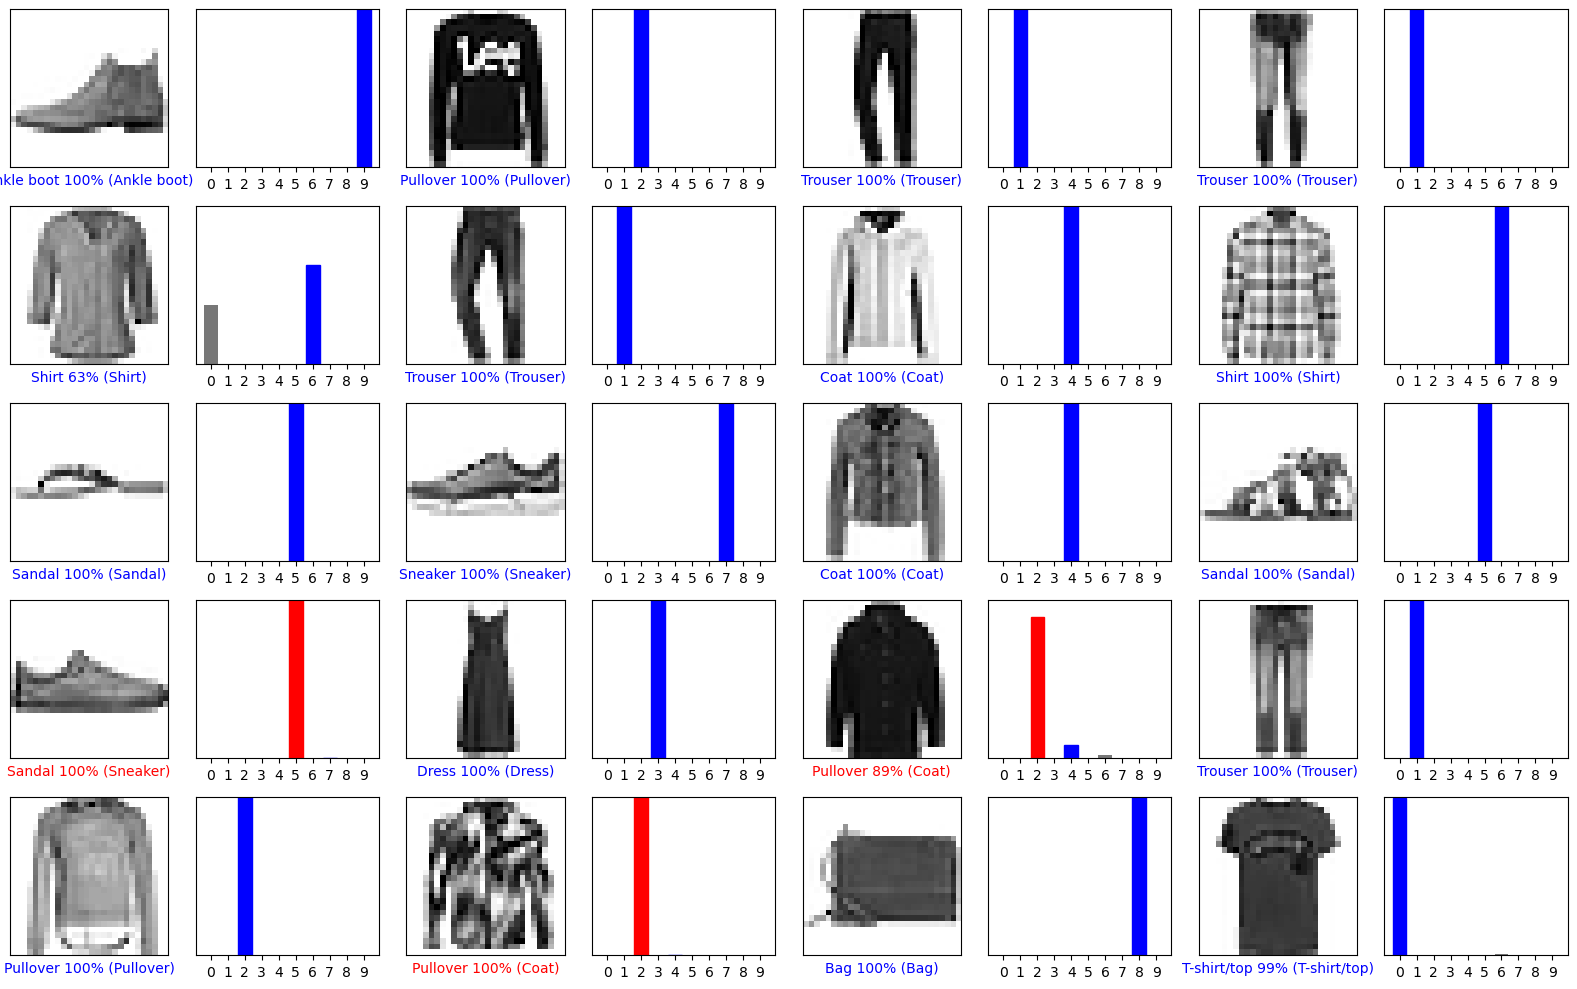

<html> <h2 style="font-style:bold; color:blue;"> Use the trained model </h2> </html>
(Advanced part)

Finally, use the trained model to make a prediction about a single image.

____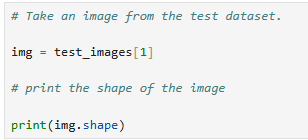

In [63]:
img = test_images[1]
print(img.shape)

(28, 28)


(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

_________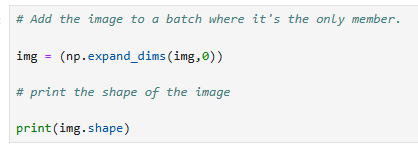

In [65]:
img= (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


(1, 28, 28)


Now predict the correct label for this image:

_________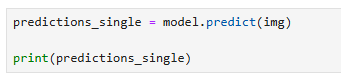

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
[[9.7e-08 0.0e+00 1.0e+00 0.0e+00 8.7e-09 5.2e-16 4.0e-09 0.0e+00 5.7e-24
  0.0e+00]]


___________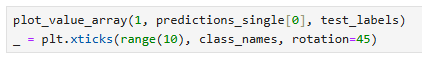

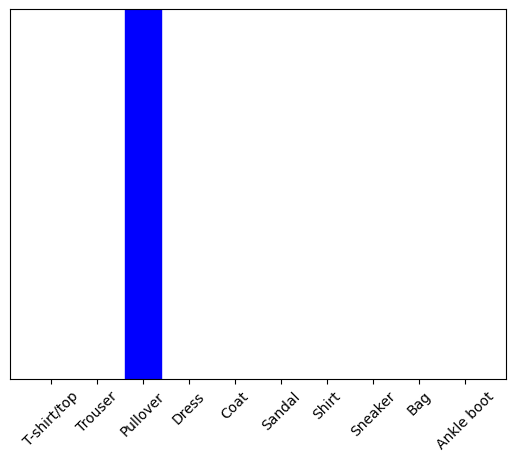

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

_________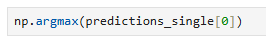

2

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### Please record your model's accuracy (test data) and a summary of its development. You can obtain the model summary using the model.summary() method. The API for obtaining the model summary is defined in the following link:

### https://keras.io/api/models/model/#summary-method

### Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.


<html> <h4 style="font-style:bold; color:red;"> NOTE: DO NOT FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB. </h4> </html>
